In [ ]:
# NFHS Website 
url1="https://raw.githubusercontent.com/achaudhury7378/My-data/master/NFHS.csv"
# Data Sheet 1
url2="https://raw.githubusercontent.com/achaudhury7378/My-data/master/Sheet1.csv"
# Indicator Specific
url3="https://raw.githubusercontent.com/achaudhury7378/My-data/master/Indicators_Specific.csv"
# District Longitude and Latitude
url4="https://raw.githubusercontent.com/achaudhury7378/My-data/master/Coordinates%20of%20Telangana%20districts.csv"

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
# sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
# plt.close("all")

In [ ]:
df=pd.read_csv(url3)
df=df.T
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header
df

Sl.No,Category,Indicators (2019-20),Urban,Rural,Total (2019-20),Total (2015-16),Adilabad,Bhadradri,Hyderabad,Jagitial,Jangoan,Jayashankar Bhupalapally,Jogulamba Gadwal,Kamareddy,Karimnagar,Khammam,KumurumBheem,Mahabubabad,Mahabubnagar,Mancherial,Medak,Medchal-Malkajgiri,Nagarkurnool,Nalgonda,Nirmal,Nizamabad,Peddapalli,Rajanna Sircilla,Ranga Reddy,Sangareddy,Siddipet,Suryapet,Vikarabad,"Wanaparthy,",Warangal Rural,Warangal Urban,Yadadri
1,Population and Household Profile,1. Female population age 6 years and above who...,75.9,52.4,60.9,62.6,58.6,62.7,80.3,55.9,56.6,52.4,47.8,51.1,63.6,61.8,52.9,55,54.8,58.4,52.3,72.9,51.1,59.8,53.3,54.3,61.3,56.4,68.6,60.2,60.8,57.4,53.1,49.3,51.8,70.3,59.1
2,Population and Household Profile,2. Population below age 15 years (%),23.4,22,22.5,25.1,24.8,19.5,23,24.1,19.1,18.5,26.8,23.4,20.1,19,23.7,21.8,27.8,19.5,23.4,23.1,23.8,23.9,22.7,23.7,18.1,21.3,24.1,24.5,22,18.9,24.9,24.8,17.3,20.2,23
3,Population and Household Profile,3. Sex ratio of the total population (females ...,1015,1070,1049,1007,992,1082,959,1219,1066,1079,1037,1104,1065,1061,1024,1067,1035,1065,1051,996,1066,1017,1171,1132,1028,1167,1022,1053,1062,1032,998,1018,1070,1087,1071
4,Population and Household Profile,4. Sex ratio at birth for children born in the...,873,907,894,872,785,817,844,955,1089,903,853,870,933,905,917,885,789,909,848,828,771,883,1138,941,913,1115,964,1039,976,980,775,987,698,829,954
5,Population and Household Profile,5. Children under age 5 years whose birth was ...,92.9,88,90,83.1,83.9,90,94.3,92.5,86.6,90.9,81.7,91,88.7,94.4,83.1,91,91.9,93.2,85.3,95,91.4,80.4,94,90.4,87.9,91.2,93.4,79.7,90,92.7,91.6,90.5,82.6,82.4,93.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Screening for Cancer among Women (age 30-49 ye...,100. Ever undergone an oral cavity examination...,3.2,2.1,2.5,na,0.6,3.2,5.9,3.4,0.2,4.9,3.2,1.6,1.6,2.1,1.2,2,1.4,1.9,2.7,0.7,2.6,1.4,1.4,1.4,3.5,3.3,1,2.4,3.5,4.1,0.6,2.2,3.8,0.4,2.1
101,Tobacco Use and Alcohol Consumption among Adul...,101. Women age 15 years and above who use any ...,2.6,7.2,5.6,na,11,4.7,1.7,11.2,4.1,5.6,9.7,5.6,5.7,2,12.8,5,7.5,6.5,6.4,3,6.2,4,13,8.6,4.6,8.5,4.5,5.4,5.2,3,11.6,8.9,2.8,1.5,5.6
102,Tobacco Use and Alcohol Consumption among Adul...,102. Men age 15 years and above who use any ki...,15.2,26.5,22.3,na,29.7,28.4,12.4,23.5,27.1,27.4,23.7,25.7,19.3,19.5,37.7,28.1,25.3,22.4,26.2,17.9,30.8,24.3,29,20.6,21.6,19.4,18.9,27.3,23.2,20.8,29.2,27.5,23.2,14,22.2
103,Tobacco Use and Alcohol Consumption among Adul...,103. Women age 15 years and above who consume ...,2.6,9,6.7,na,2.1,2.9,0.7,2.6,11.3,4.3,7.1,16.7,5.6,1.3,3,12.6,8,1.9,23.8,2.4,11.8,7.4,3.5,9.8,4.2,6.1,6.7,11.2,8.3,6.1,17,8.7,6.5,2.9,12.9


In [ ]:
df.replace('na', np.nan, inplace=True)

In [ ]:
def single_feature_plot(idx,name_feature,x_label):
  stunted_idx=df.iloc[idx,6:].index.tolist()
  stunted_vals=df.iloc[idx,6:].values.astype('float')
  # set font
  plt.rcParams['font.family'] = 'sans-serif'
  plt.rcParams['font.sans-serif'] = 'Helvetica'

  # set the style of the axes and the text color
  plt.rcParams['axes.edgecolor']='#333F4B'
  plt.rcParams['axes.linewidth']=0.8
  plt.rcParams['xtick.color']='#333F4B'
  plt.rcParams['ytick.color']='#333F4B'
  plt.rcParams['text.color']='#333F4B'

  # create some fake data
  stunted=pd.Series(stunted_vals, index=stunted_idx)
  stunted_df = pd.DataFrame({'vals' : stunted}) 
  stunted_df = stunted_df.sort_values(by='vals')


  # we first need a numeric placeholder for the y axis
  my_range=list(range(1,len(stunted_df.index)+1))

  fig, ax = plt.subplots(figsize=(10,8))

  # create for each expense type an horizontal line that starts at x = 0 with the length 
  # represented by the specific expense percentage value.
  plt.hlines(y=my_range, xmin=0, xmax=stunted_df['vals'], color='#007ACC', alpha=0.2, linewidth=5)

  # create for each expense type a dot at the level of the expense percentage value
  plt.plot(stunted_df['vals'], my_range, "o", markersize=5, color='#007ACC', alpha=0.6)

  # set labels
  ax.set_xlabel(x_label, fontsize=15, fontweight='black', color = '#333F4B')
  ax.set_ylabel('')

  # set axis
  ax.tick_params(axis='both', which='major', labelsize=12)
  plt.yticks(my_range, stunted_df.index)

  # add an horizonal label for the y axis 
  fig.text(-0.23, 0.96, name_feature, fontsize=15, fontweight='black', color = '#333F4B')

  # change the style of the axis spines
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

  ax.spines['left'].set_bounds((1, len(my_range)))
  # ax.set_xlim(0,25)

  ax.spines['left'].set_position(('outward', 8))
  ax.spines['bottom'].set_position(('outward', 5))

  # plt.savefig('hist2.png', dpi=300, bbox_inches='tight')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


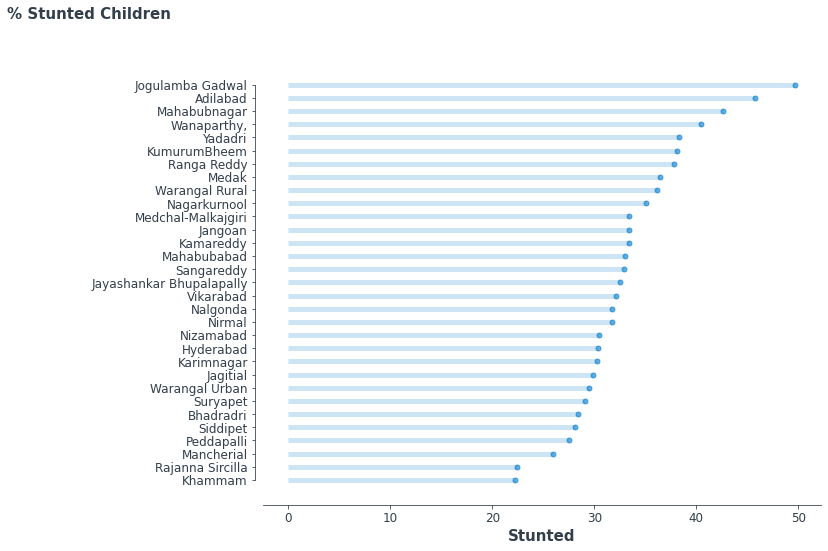

In [ ]:
single_feature_plot(72,'% Stunted Children','Stunted')

In [ ]:
def plot_two_feaure(idx1,idx2,label1,label2,title):
  index=df.iloc[idx1,6:].index
  value1=df.iloc[idx1,6:].values.astype('float')
  value2=df.iloc[idx2,6:].values.astype('float')
  l=len(df.iloc[idx2,6:].values.astype('float'))
  Wt_df = pd.DataFrame({'group':index, label1:value1 , label2:value2 })
  
  # Reorder it following the values of the first value:
  ordered_df = Wt_df.sort_values(by=label1)
  my_range=range(1,len(Wt_df.index)+1)
  fig, ax = plt.subplots(figsize=(10,8))
  # The horizontal plot is made using the hline function
  plt.hlines(y=my_range, xmin=ordered_df[label1], xmax=ordered_df[label2], color='grey', alpha=0.4)
  plt.scatter(ordered_df[label1], my_range, color='blue', alpha=1, label=label1)
  plt.scatter(ordered_df[label2], my_range, color='red', alpha=1, label=label2)
  plt.legend()

  # Add title and axis names
  plt.yticks(my_range, ordered_df.group)
  plt.title(title, loc='left')
  plt.xlabel('Value of the variables')
  plt.ylabel('Districts')

  # Show the graph
  plt.show()

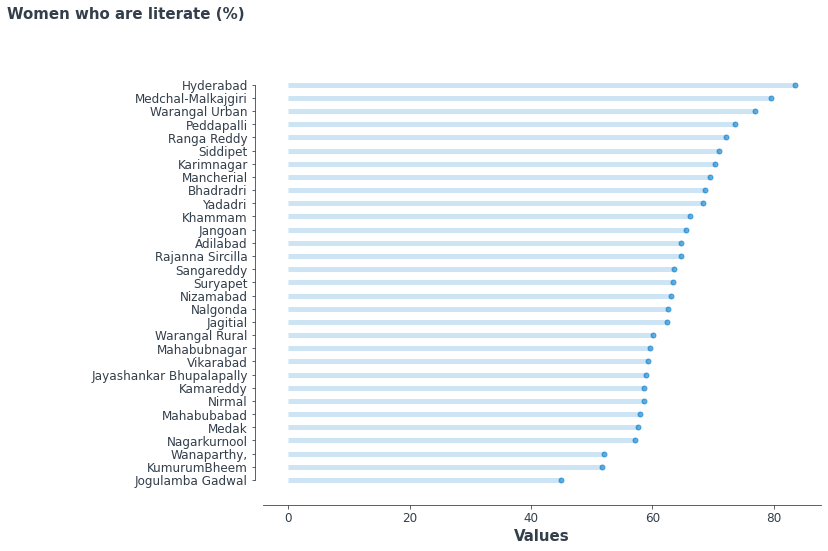

In [ ]:
single_feature_plot(13,'Women who are literate (%)','Values')

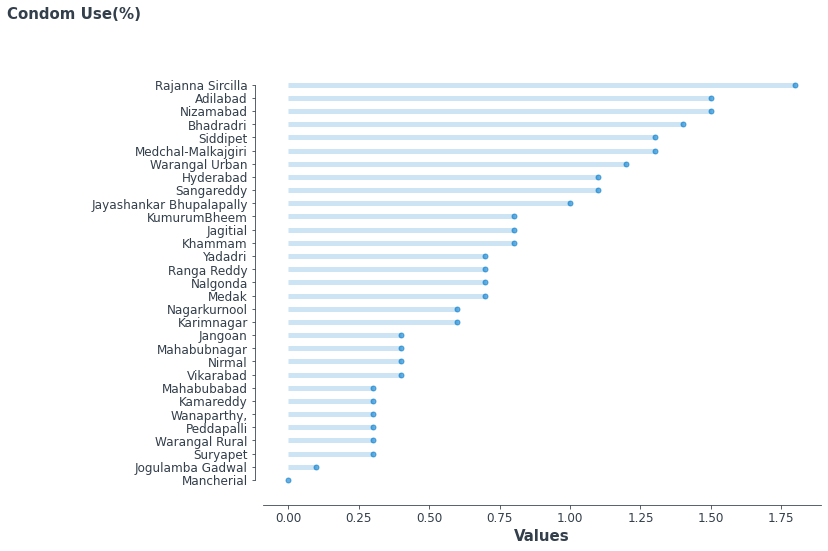

In [ ]:
single_feature_plot(25,'Condom Use(%)','Values')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


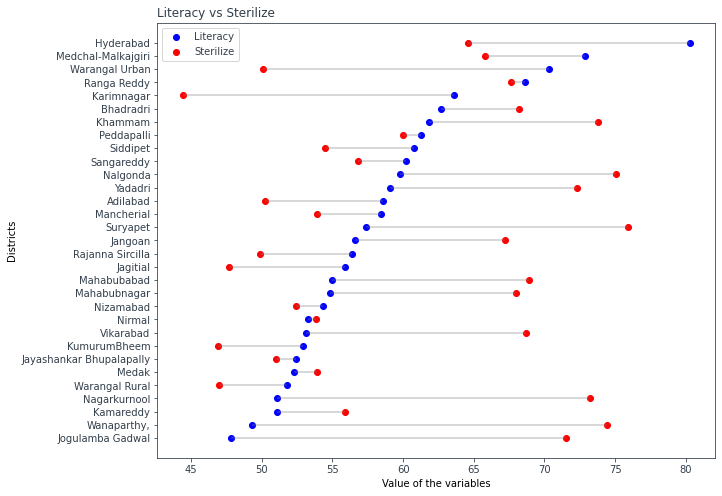

In [ ]:
plot_two_feaure(0,21,'Literacy','Sterilize','Literacy vs Sterilize')

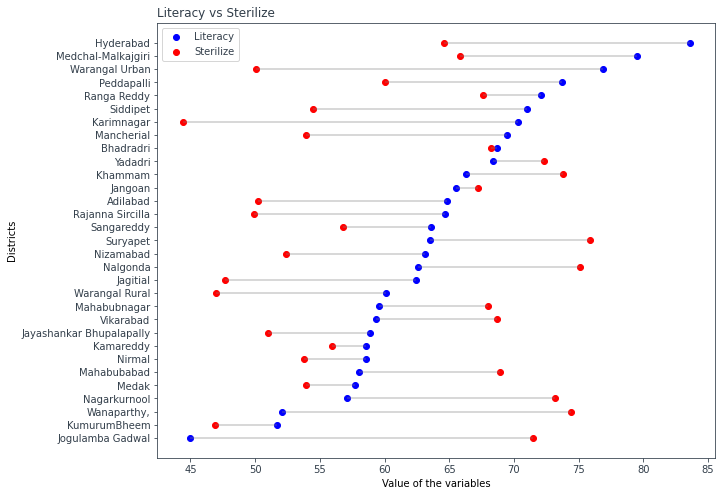

In [ ]:
plot_two_feaure(13,21,'Literacy','Sterilize','Literacy vs Sterilize')

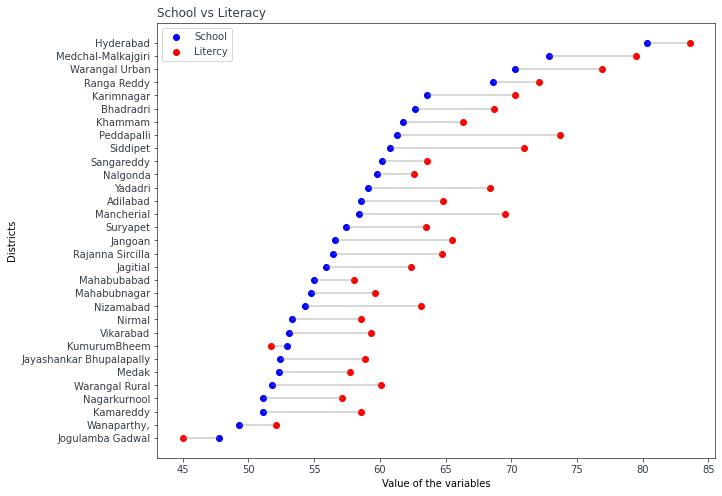

In [ ]:
plot_two_feaure(0,13,'School','Litercy','School vs Literacy')

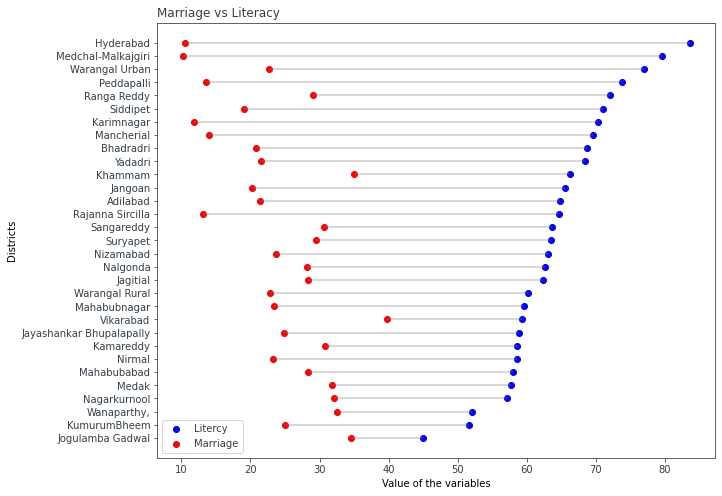

In [ ]:
plot_two_feaure(13,15,'Litercy','Marriage','Marriage vs Literacy')

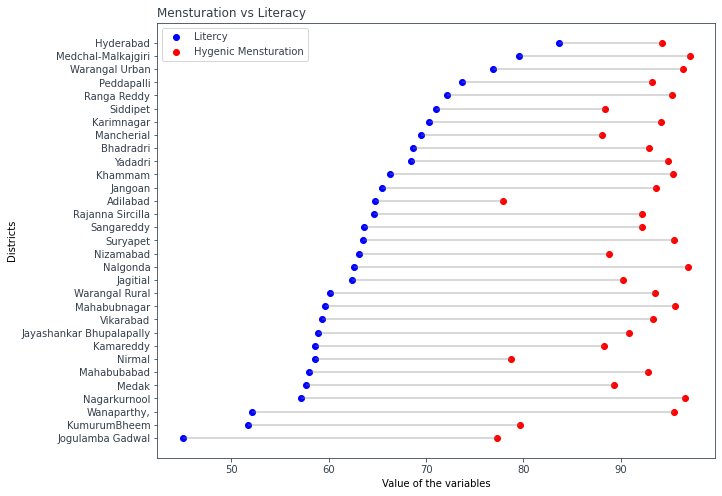

In [ ]:
plot_two_feaure(13,18,'Litercy','Hygenic Mensturation','Mensturation vs Literacy')

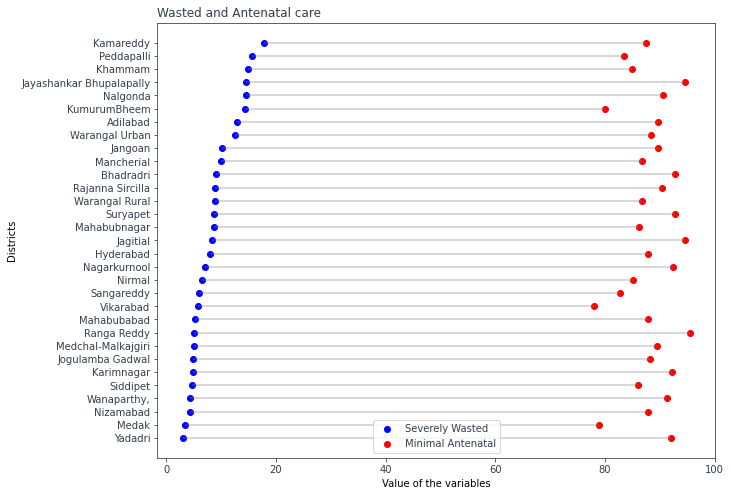

In [ ]:
plot_two_feaure(74,31,'Severely Wasted','Minimal Antenatal','Wasted and Antenatal care')

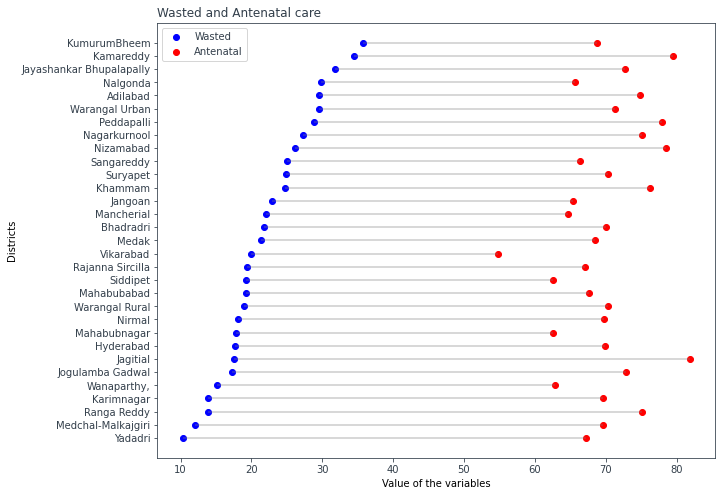

In [ ]:
plot_two_feaure(73,32,'Wasted','Antenatal','Wasted and Antenatal care')

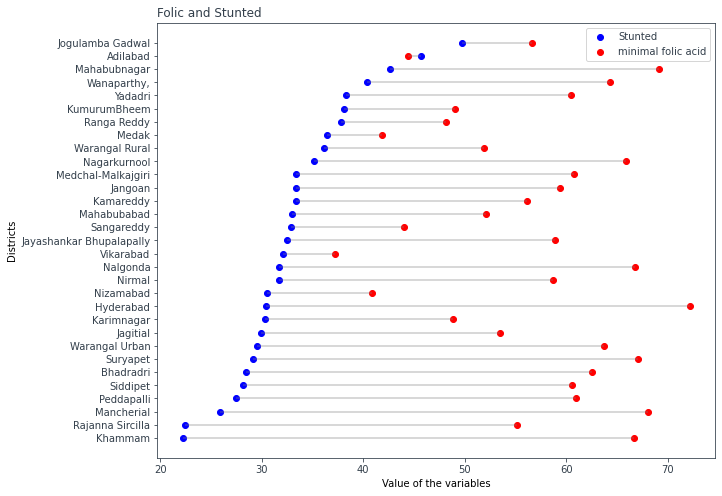

In [ ]:
plot_two_feaure(72,34,'Stunted','minimal folic acid','Folic and Stunted')

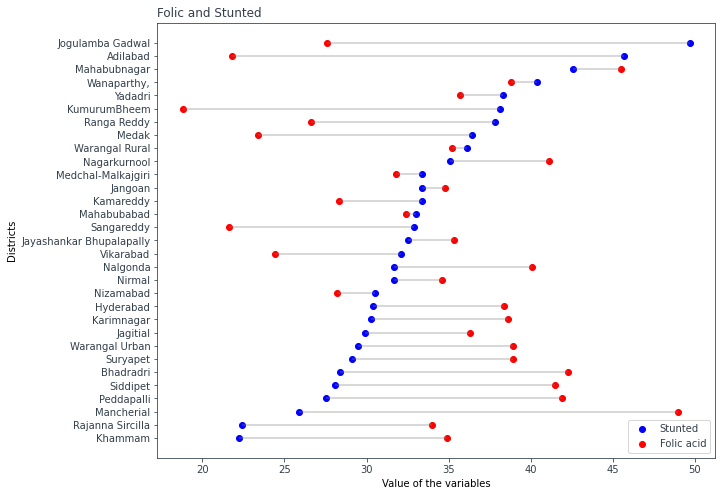

In [ ]:
plot_two_feaure(72,35,'Stunted','Folic acid','Folic and Stunted')

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("whitegrid", {'axes.grid' : False})
col_names = ['Indicators (2019-20)','Rural','Urban']
list_of_indicators = df.iloc[6:10,1].tolist()
data = df[df['Indicators (2019-20)'].isin(list_of_indicators)][col_names]
data.set_index('Indicators (2019-20)', inplace=True) 
data

Sl.No,Rural,Urban
Indicators (2019-20),,
7. Population living in households with electricity (%),99.4,99.8
8. Population living in households with an improved drinking-water source1 (%),98.4,99.4
9. Population living in households that use an improved sanitation facility2 (%),72.9,81.8
10. Households using clean fuel for cooking3 (%),88.3,98.2


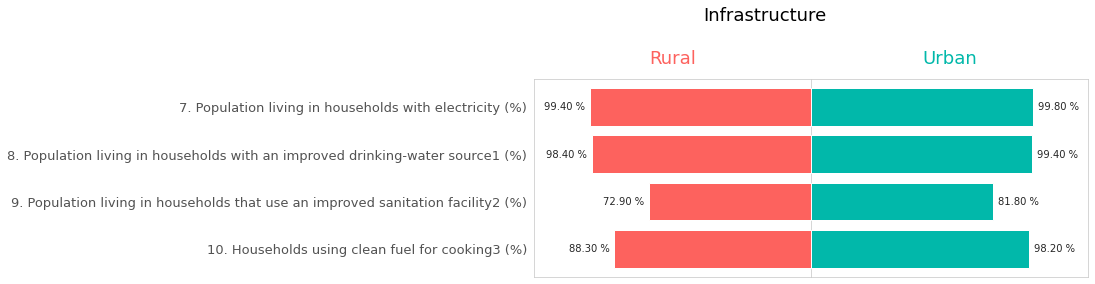

In [ ]:
data['Rural'] = data['Rural'].astype(float)
data['Rural'] = data['Rural'] * (-1)
data['Urban']= data['Urban'].astype(float)
data['Urban'] = data['Urban'] 


font_color = '#525252'
hfont = {'fontname':'Calibri'}
# facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = data.index
column0 = data['Rural'] 
column1 = data['Urban'] 
title0 = 'Rural' 
title1 = 'Urban'


# fig, axes = plt.subplots(figsize=(10,5), facecolor=facecolor, ncols=2, sharey=True)
fig, axes = plt.subplots(figsize=(10,5), ncols=2, sharey=True)
fig.tight_layout()
fig.suptitle('Infrastructure', y=0.85, fontsize=18, color='black',**hfont)
 
axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)

rects0 = axes[0].patches
rects1 = axes[1].patches

# For each bar: Place a label
for rect0, rect1 in zip(rects0, rects1):
    # Get X and Y placement of label from rect.
    x_value0 = rect0.get_width()
    y_value0 = rect0.get_y() + rect0.get_height() / 2

    x_value1 = rect1.get_width()
    y_value1 = rect1.get_y() + rect1.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space0 = -5
    space1 = 5
    # Vertical alignment for positive values
    ha0 = 'left'
    ha1 = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value0 < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha0 = 'right'

    # Use X value as label and format number with one decimal place
    label0 = "{:.2f} %".format(x_value0*(-1))
    label1 = "{:.2f} %".format(x_value1)

    # Create annotation
    axes[0].annotate(
        label0,                      # Use `label` as label
        (x_value0, y_value0),         # Place label at end of the bar
        xytext=(space0, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha0)                      # Horizontally align label differently for
                                    # positive and negative values.

    # Create annotation
    axes[1].annotate(
        label1,                      # Use `label` as label
        (x_value1, y_value1),         # Place label at end of the bar
        xytext=(space1, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.


axes[0].margins(0.25, 0.05)
axes[1].margins(0.25, 0.05)

axes[0].tick_params(labelbottom = False, bottom = False)
axes[1].tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

plt.gca().invert_yaxis()

axes[0].set(yticks=data.index, yticklabels=data.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='white')

# axes[1].set_xticks([1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]) 
# axes[1].set_xticklabels([1000, 2000, 3000, 4000, 5000, 6000, 7000]) 

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)

plt.subplots_adjust(wspace=0, top=0.65, bottom=.1, left=0.18, right=0.95)